# CA Multiple Linear Regression

In [392]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Importing the dataset 

In [212]:
#Importing the data
mlr6_data = pd.read_csv("mlr6.csv")

### Explanatory Data Analysis and Cleaning

In [265]:
#first 5 rows of the data set
mlr6_data.head()

,y,x1,x2,x3
0,16270.189819,54.290459,196.243633,C
1,18169.456998,54.065187,204.141635,A
2,15559.583612,51.437386,198.786582,A
3,16087.907983,52.206995,194.490189,C
4,16374.396237,55.142860,197.968667,C


Check for missing values

In [268]:
print(mlr6_data.isnull().sum())

y     0
x1    0
x2    0
x3    0
dtype: int64


Checking the correlation between the variables

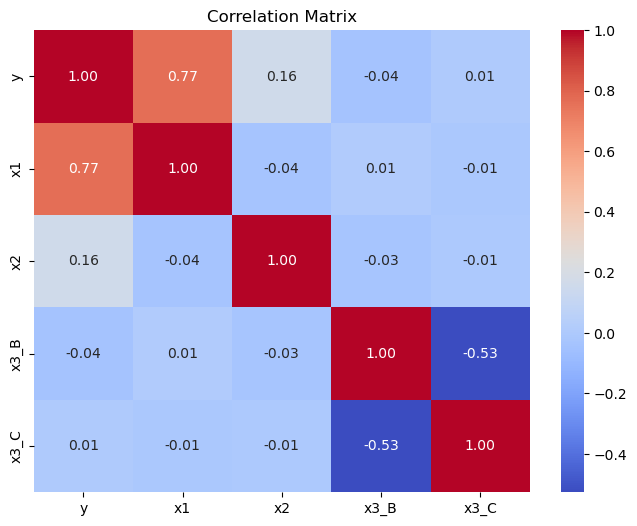

In [402]:
corr_matrix = mlr6_data[["y","x1", "x2", "x3_B", "x3_C"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Data Preparation

The column x3 is in categorical values, using the one-hot enconding we will transform in numerical value, so we can continue with the multiple linear regression model

In [272]:
# One-hot encode categorical variable 'x3'
mlr6_data = pd.get_dummies(mlr6_data, columns=['x3'], drop_first=True)

The drop-first removes one of the binary columns to avoid multicollinearity (one column can be predicted from the others), and by dropping the first category, we reduce redundancy

In [275]:
mlr6_data.head()

,y,x1,x2,x3_B,x3_C
0,16270.189819,54.290459,196.243633,False,True
1,18169.456998,54.065187,204.141635,False,False
2,15559.583612,51.437386,198.786582,False,False
3,16087.907983,52.206995,194.490189,False,True
4,16374.396237,55.142860,197.968667,False,True


If x3_B and x3_C are False, we can predict the A is True

Checking the type of the columns

In [279]:
mlr6_data.dtypes

y       float64
x1      float64
x2      float64
x3_B       bool
x3_C       bool
dtype: object

Need to convert the boolean values to integer/float values before apply the model

In [282]:
mlr6_data['x3_B'] = mlr6_data['x3_B'].astype(int)
mlr6_data['x3_C'] = mlr6_data['x3_C'].astype(int)
mlr6_data.head()

,y,x1,x2,x3_B,x3_C
0,16270.189819,54.290459,196.243633,0,1
1,18169.456998,54.065187,204.141635,0,0
2,15559.583612,51.437386,198.786582,0,0
3,16087.907983,52.206995,194.490189,0,1
4,16374.396237,55.142860,197.968667,0,1


Getting the relevant measures like mean, median, standard deviation, minimum, and maximum values

In [285]:
print(mlr6_data.describe())

                  y           x1           x2         x3_B         x3_C
count   1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean   15461.118352    49.995868   199.921427     0.403000     0.291000
std     1795.134480     4.914345     4.348718     0.490746     0.454451
min     7972.734953    33.147892   186.235221     0.000000     0.000000
25%    14434.325581    47.268212   197.441882     0.000000     0.000000
50%    15521.006387    49.963315   199.910862     0.000000     0.000000
75%    16538.968858    53.006301   202.461691     1.000000     1.000000
max    21565.781403    69.425729   214.460893     1.000000     1.000000


#### Spliting the data set in train and test partitions, with the seed corresponding the student number

In [288]:
student_number = 23436786
mlr6_train, mlr6_test = train_test_split( mlr6_data, test_size=0.2, random_state=student_number)

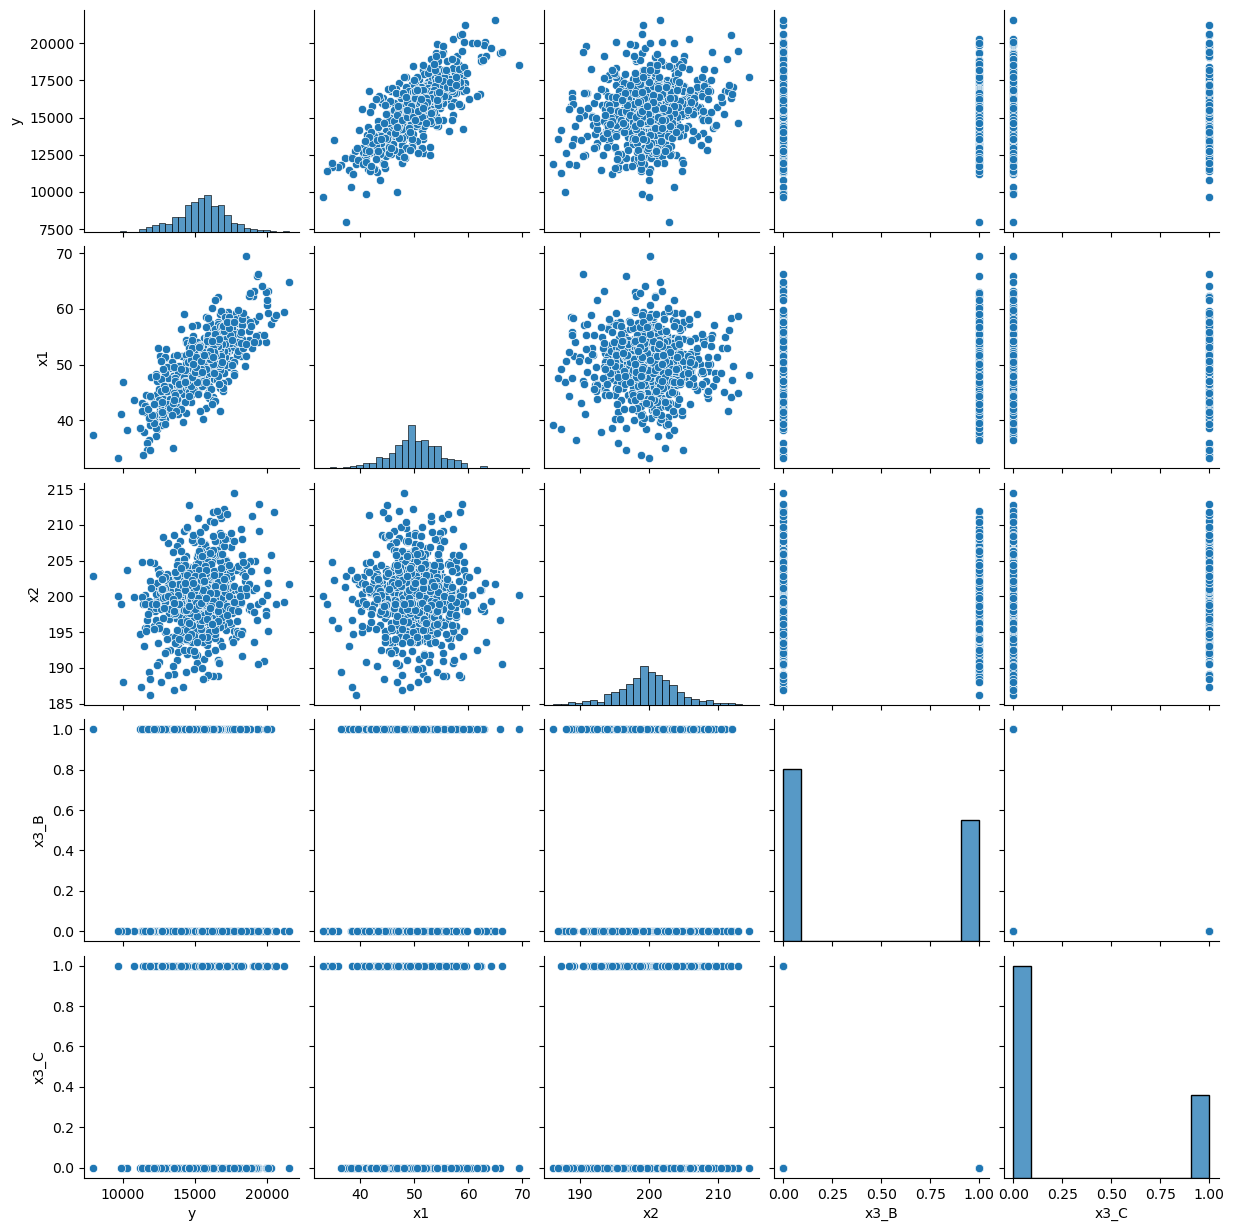

In [290]:
sns.pairplot(mlr6_train)

### OLS Model

In [125]:
x = mlr6_train[["x1","x2","x3_B","x3_C"]]
x = sm.add_constant(x)
mlr6_model = sm.OLS(
    mlr6_train['y'],
    x
)
fit = mlr6_model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     369.2
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          1.38e-179
Time:                        11:39:18   Log-Likelihood:                -6702.4
No. Observations:                 800   AIC:                         1.341e+04
Df Residuals:                     795   BIC:                         1.344e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.507e+04   1783.246     -8.450      0.0

### Coefficient and P-value analysis 

-  The _const_ coefficient value indicates that the value of _y_ (dependent variable) will be -1.507e+04 when all the independent variables are at 0.

- The value for the _x1_ coefficient indicates that the value of _y_ will change by 282.8539 when the value of _x1_ changes by 1 and all the other _x_ variables are unchanged. This variable has a __highly significant p-value__ of 0.000, meaning it is __strongly contributing to the model__.

-  The value for the _x2_ coefficient indicates that the value of _y_ will change by 82.5952 when the value of _x2_ changes by 1 and all the other _x_ variables are unchanged. This variable has a __significant p-value__ of 0.000, meaning it is __contributing to the model__.

- The value for the _x3_B_ (assuming x3_C is 0 and x3_B = 1) coefficient indicates that the value of _y_ will decrease by 247.4317 when the value of _x3_B_ changes by 1 and all the other _x_ variables are unchanged. This variable is __significant with a p-value__ of 0.006, suggesting a __strong relationship__ with the dependent variable.

-  The value for the _x3_C_ (assuming x3_C = 1 and x3_B is 0) coefficient indicates that the value of _y_ will decrease by 56.7738 when the value _x3_C_ changes by 1 and all the other _x_ variables are unchanged. This variable is __not statistically significant__, as the p-value is 0.561, which is much higher than the typical alpha of 0.05, and may not be necessary.

## F-Statistic and Prob (F-statistic) analysis

- This _p-value_ for the overall _F-statistic_ of the model. A high F-statistic value (369.2) and the very low _p-value_ (1.38e-179) indicate that the model as a whole is __statistically significant__.
The model is __highly likely to be a good fit for the data__.

## R-squared

___R-squared___ is 0.650. This means that about 65% of the variation in the dependent variable (y) can be explained by the independent variables (x1, x2, x3_B, x3_C).


#### Let’s use the model to predict the values of y for all values of x in the test data.

In [137]:
x = mlr6_test[["x1","x2","x3_B","x3_C"]]
x = sm.add_constant(x)
y_predicted = fit.predict(x)
y_actual = mlr6_test["y"]

## Mean absolute error

In [140]:
errors = y_predicted- y_actual
absolute_errors= abs(errors)
sum_absolute_errors= absolute_errors.sum()
mae = sum_absolute_errors/ len(y_predicted)
mae

911.5279174892966

## Mean for the actual values

In [143]:
mean_y_actual = y_actual.mean()
mean_y_actual

15395.108577829413

In [145]:
relative_error_mean = (mae / mean_y_actual) * 100
relative_error_mean


5.920893073803931

The __mean absolute error__ (911.5279174892966) compare with the __mean__ (15395.108577829413) of the actual values, suggests _the model is performing well_, with errors less than 10%. The __relative error mean__ its 5.92%

## Range

In [149]:
range_y_actual = y_actual.max() - y_actual.min()
range_y_actual

11945.23190990429

## Relative error with the mean

__mean absolute error relative__ to the Range

In [153]:
relative_error_range = (mae / range_y_actual) * 100
relative_error_range

7.630893434002823

Compare the __mean absolute error__(911.5279174892966) to the __range__(11945.23190990429) shows how large the errors are relative to the overall spread of the data. In this case, its 7.63%, small if compared with the variability of the data.

## Regression diagnostics

In [157]:
#y_hat -> The predicted values (y^) from the model.
y_hat= fit.fittedvalues.values.tolist()
#residuals -> The difference between actual values and predicted values which represent the model's errors
residuals= fit.resid
# influence -> calculates various diagnostics, including leverage, Cook's distance, and residuals.
influence= fit.get_influence()
standardised_residuals= influence.resid_studentized_internal
studentised_residuals= influence.resid_studentized_external
#root residuals -> The square root of the absolute value of studentized residuals
root_residuals= abs(studentised_residuals)**0.5
# leverage -> measures how much influence each data point has on the fitted values. High leverage points can disproportionately affect the regression.
leverage= influence.hat_matrix_diag
cooks_distances, p= influence.cooks_distance
#Generates theoretical quantiles for a Q-Q plot, which assesses whether the residuals are normally distributed. 
np.random.seed(student_number)
theoretical_quantiles= np.sort(
    np.random.normal(
        loc = 0,
        scale = 1,
        size = len(residuals)
    )
)
#outliers -> Identifies observations with studentized residuals greater than 2 (common threshold for outliers).
outliers= [i+1 if abs(s) > 2 else "" for i,s in zip(range(len(fit.resid)),studentised_residuals)]
#loess -> Fits a Locally Weighted Scatterplot Smoothing (LOWESS) curve to the root residuals vs. fitted values.
#helps visualize trends in residuals, such as heteroscedasticity or systematic patterns.
loess = sm.nonparametric.lowess(
    root_residuals,
    y_hat,
    it = 0,
    delta = 0.01 * (max(y_hat)- min(y_hat))
)

## Residuals vs Fitted Values

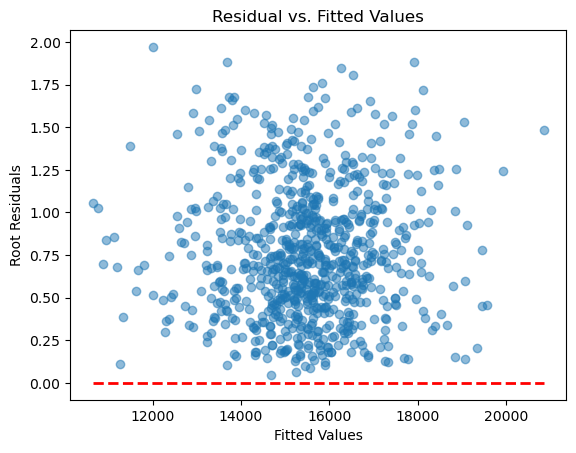

In [160]:
plt.scatter(y_hat, root_residuals, alpha=0.5)
plt.plot([min(y_hat), max(y_hat)], [0, 0], 'r--', lw=2)
plt.xlabel("Fitted Values")
plt.ylabel("Root Residuals")
plt.title("Residual vs. Fitted Values")
plt.show()

The residuals appear randomly scattered around 0.
There doesn’t appear to be a clear systematic pattern.
There are a few residuals toward the top of the range.

## Q-Q Plot

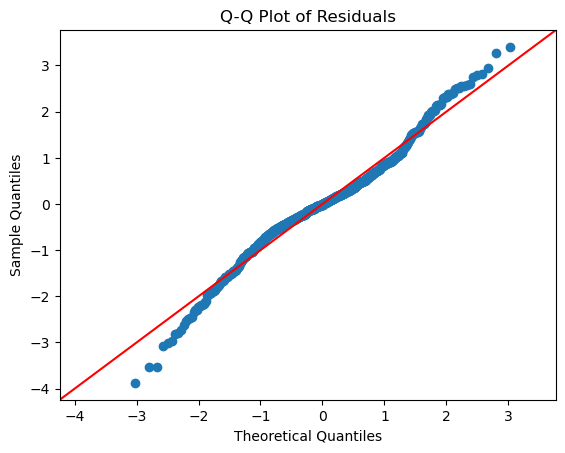

In [166]:
sm.qqplot(studentised_residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

The residuals generally follow the red line, indicating that they are approximately __normally distributed__. But, there are some deviations at both ends of the plot, suggesting the presence of a few __outliers__.

## Cook's distance

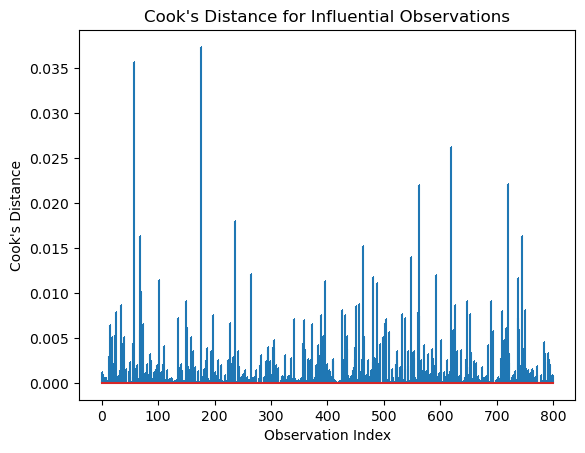

In [171]:
plt.stem(range(len(cooks_distances)), cooks_distances, markerfmt=",")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance for Influential Observations")
plt.show()

There are several large spikes in Cook's Distance plot, indicating the presence of influential observations. More attention and futher investigation required.

## Futher investigation
Checking homoscedasticity of residuals in the regression model

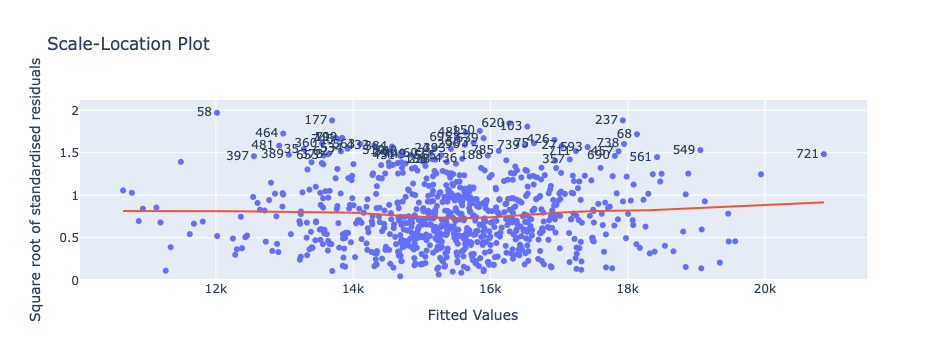

In [179]:
fig= go.Figure(go.Scatter(
x = y_hat,
y = root_residuals,
text = outliers,
hoverinfo = "skip",
mode = "markers+text",
showlegend=False)
)
fig= fig.update_yaxes(rangemode= "tozero")
fig= fig.update_traces(textposition= "middle left")
fig= fig.add_trace(go.Scatter(
x = loess[:,0],
y = loess[:,1],
mode = "lines",
name = "LOESS",
showlegend= False)
)
fig.update_layout(
title = "Scale-Location Plot",
xaxis_title= "Fitted Values",
yaxis_title= dict(text="Square root of standardised residuals",font=dict(size=14))
)

There is no particular pattern to the residuals, needs more analysis.

## Outliers

The column x3 its outside from the outlier check, because its not numerical, its categorical.

Z-Score Method

In [340]:
z_scores = mlr6_data[['y', 'x1', 'x2']].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print("Outliers detected using Z-score:\n", outliers.sum())

Outliers detected using Z-score:
 20


IQR Method

In [343]:
# Calculate the IQR for numerical columns (y, x1, x2)
mlr6_data_numerical = mlr6_data[["y","x1","x2"]]
Q1 = mlr6_data_numerical.quantile(0.25)
Q3 = mlr6_data_numerical.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers (rows outside Q1 - 1.5*IQR or Q3 + 1.5*IQR)
outliers_iqr = ((mlr6_data_numerical < (Q1 - 1.5 * IQR)) | (mlr6_data_numerical > (Q3 + 1.5 * IQR))).any(axis=1)
print("Outliers detected using IQR Method:\n", outliers_iqr.sum())

Outliers detected using IQR Method:
 85


The ___z-score method___ assumes the data is approximately normally distributed. The ___IQR method___ does not assume a specific data distribution, so it works better with skewed or non-normal data.

Removing the outliers

In [347]:
# Remove outliers
mlr6_cleaned_numerical = mlr6_data_numerical[~outliers_iqr]
mlr6_data_categorical = mlr6_data[["x3_B","x3_C"]]
mlr6_cleaned = pd.concat([mlr6_cleaned_numerical, mlr6_data_categorical[~outliers_iqr]], axis=1)


In [349]:
# Check the shapes of the original and cleaned mlr6 data
print("Original Dataset Shape:", mlr6_data.shape)
print("Cleaned Dataset Shape:", mlr6_cleaned.shape)


Original Dataset Shape: (1000, 5)
Cleaned Dataset Shape: (915, 5)


In [355]:
mlr6_cleaned_numerical = mlr6_data_numerical[~outliers]
mlr6_cleaned_z_score = pd.concat([mlr6_cleaned_numerical, mlr6_data_categorical[~outliers]], axis=1)

In [357]:
# Check the shapes of the original and cleaned mlr6 data
print("Original Dataset Shape:", mlr6_data.shape)
print("Cleaned Dataset Shape:", mlr6_cleaned_z_score.shape)

Original Dataset Shape: (1000, 5)
Cleaned Dataset Shape: (980, 5)


## OLS Model with the cleaned data using the z-score method to remove the outliers

In [361]:
mlr6_cleaned_train, mlr6_cleaned_test = train_test_split( mlr6_cleaned_z_score, test_size=0.2, random_state=student_number)

In [367]:
x = mlr6_cleaned_train[["x1","x2","x3_B","x3_C"]]
x = sm.add_constant(x)
mlr6_cleaned_model = sm.OLS(
    mlr6_cleaned_train['y'],
    x
)
fit = mlr6_cleaned_model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     281.2
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          1.65e-149
Time:                        20:02:14   Log-Likelihood:                -6585.8
No. Observations:                 784   AIC:                         1.318e+04
Df Residuals:                     779   BIC:                         1.320e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.357e+04   1890.034     -7.179      0.0

After cleaning the data set removing the outliers wit
The R-squared decreased but the p-value of the x3_B increased 0.324 units.

## OLS Model with the cleaned data using the IQR method to remove the outliers

In [370]:
mlr6_cleaned_iqr_train, mlr6_cleaned_iqr_test = train_test_split( mlr6_cleaned, test_size=0.2, random_state=student_number)

In [372]:
x = mlr6_cleaned_iqr_train[["x1","x2","x3_B","x3_C"]]
x = sm.add_constant(x)
mlr6_cleaned_iqr_model = sm.OLS(
    mlr6_cleaned_iqr_train['y'],
    x
)
fit = mlr6_cleaned_iqr_model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     228.2
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          7.89e-127
Time:                        20:27:17   Log-Likelihood:                -6098.2
No. Observations:                 732   AIC:                         1.221e+04
Df Residuals:                     727   BIC:                         1.223e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.035e+04   2033.832     -5.090      0.0

#### Analysis of the difference between the model after cleaning the data

After remove the outliers in the mlr6 data, using two different method (IQR Method and Z-score Method) to check the existence of outliers, we applied the OLS model in the two cleaned data. The next points are observed:

- The ___R-squared___ decreased significantly after cleaning using the __IQR__ method (0.557). The __Z-score__ method (0.591) decreased the R-squared as well. The model explains less variance in y after more aggressive outlier removal from IQR Method

- The ___F-statistic___ decreased further after IQR cleaning, reflecting the impact of removing a larger number of data points. But, the model is still statistically significant overall (p < 0.05).

- The coefficients for x1 and x2 decreased slightly but remain highly significant (p < 0.001) across all models. The coefficient x3_B became more significant after IQR cleaning (p = 0.002), indicating a more stable effect. The Z-score cleaning differently, turn the x3_B not significantly (p = 0.330), compared to the original data and iqr cleaned data.

- ___Durbin-Watson Statistic___, after IQR cleaning: 2.063 (improved, indicating no autocorrelation in residuals).

Overall analysis Z-Score cleaning:
- Removes fewer outliers, retains more data, and has a higher R-squared compared to the IQR method.
However, x3_B and x3_C became non-significant, possibly due to reduced variability.

Overall analysis Original Model (Before Cleaning):
- Highest R-squared and Adjusted R-squared.
- Residuals and diagnostics indicate some issues with outliers and assumptions.

## Multicollinearity

In [394]:
# Add a constant to include the intercept in the model
X = add_constant(mlr6_cleaned[["x1", "x2", "x3_B", "x3_C"]])

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  Variable          VIF
0    const  3015.460098
1       x1     1.003376
2       x2     1.003955
3     x3_B     1.377288
4     x3_C     1.376389


Even that the const VIF its high, its normal because the correlation with the others variables, but doesn't affect the model's validity. All predictors have VIF values below 5, indicating ___no multicollinearity___ concerns.